In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

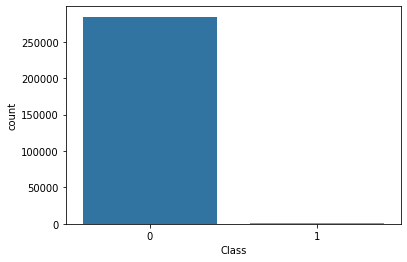

In [4]:
# Count Plot (a.k.a. Frequency bar Plot)
sns.countplot(x = 'Class', data = data)

In [5]:
X = data.values[:,:-1]
Y = data.values[:,-1]
Y = Y.astype('int')

In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [8]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 200)
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)

In [9]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(confusion_matrix(Y_test, Y_pred_lr))
print('\nClassification report\n',classification_report(Y_test, Y_pred_lr, target_names = ['No Fraud', 'Fraud']))
print('\nAccuracy Score :',round(accuracy_score(Y_test, Y_pred_lr),4))

[[85286    16]
 [   50    91]]

Classification report
               precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     85302
       Fraud       0.85      0.65      0.73       141

    accuracy                           1.00     85443
   macro avg       0.92      0.82      0.87     85443
weighted avg       1.00      1.00      1.00     85443


Accuracy Score : 0.9992


# UPSAMPLING DATA

In [10]:
from sklearn.utils import resample

df_majority = data[data['Class'] == 0]
df_minority = data[data['Class'] == 1]

df_minority_upsampled = resample(df_minority,
                                 replace = True,
                                 n_samples = 250000,
                                 random_state = 10)

data1 = pd.concat([df_majority,df_minority_upsampled])

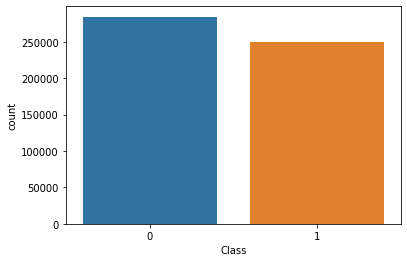

In [11]:
sns.countplot(x = 'Class', data = data1)

In [12]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534315 entries, 0 to 144108
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    534315 non-null  float64
 1   V1      534315 non-null  float64
 2   V2      534315 non-null  float64
 3   V3      534315 non-null  float64
 4   V4      534315 non-null  float64
 5   V5      534315 non-null  float64
 6   V6      534315 non-null  float64
 7   V7      534315 non-null  float64
 8   V8      534315 non-null  float64
 9   V9      534315 non-null  float64
 10  V10     534315 non-null  float64
 11  V11     534315 non-null  float64
 12  V12     534315 non-null  float64
 13  V13     534315 non-null  float64
 14  V14     534315 non-null  float64
 15  V15     534315 non-null  float64
 16  V16     534315 non-null  float64
 17  V17     534315 non-null  float64
 18  V18     534315 non-null  float64
 19  V19     534315 non-null  float64
 20  V20     534315 non-null  float64
 21  V21     53

In [13]:
data1.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,534315.000000,534315.000000,534315.000000,534315.000000,534315.000000,534315.000000,534315.000000,534315.000000,534315.000000,534315.000000,...,534315.000000,534315.000000,534315.000000,534315.000000,534315.000000,534315.000000,534315.000000,534315.000000,534315.000000,534315.000000
mean,88230.851324,-2.228427,1.692454,-3.283644,2.120413,-1.469039,-0.653357,-2.596507,0.267355,-1.204291,...,0.333298,0.005543,-0.018831,-0.048559,0.020198,0.024632,0.079474,0.035532,104.042761,0.467889
std,48156.961813,5.413778,3.652427,6.100457,3.169544,4.124592,1.743534,5.724496,4.736958,2.282599,...,2.718875,1.150201,1.174688,0.567780,0.664592,0.477840,0.989184,0.445994,253.210607,0.498968
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,46602.000000,-2.645946,-0.190562,-4.769752,-0.199033,-1.664818,-1.458897,-2.842994,-0.204461,-2.133380,...,-0.175273,-0.540395,-0.234735,-0.397079,-0.316093,-0.290306,-0.064128,-0.058216,1.600000,0.000000
50%,80643.000000,-0.714497,0.885198,-1.188498,1.184526,-0.394748,-0.618898,-0.567844,0.140486,-0.646203,...,0.130749,0.028234,-0.031632,0.009210,0.049970,-0.016023,0.043583,0.031878,18.980000,0.000000
75%,134855.000000,1.082146,2.632881,0.403161,4.016731,0.492122,0.100492,0.298621,0.818118,0.208494,...,0.609508,0.574294,0.190887,0.380442,0.389711,0.322188,0.416546,0.204124,99.990000,1.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [14]:
data1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
X = data1.values[:,:-1]
Y = data1.values[:,-1]
Y = Y.astype('int')

In [16]:
sc.fit(X)
X = sc.transform(X)

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [18]:
test = pd. DataFrame()
test['Class'] = Y_test
test.head()

,Class
0,1
1,1
2,0
3,0
4,0


# LOGISTIC REGRESSION

In [19]:
lr = LogisticRegression(max_iter = 200)
lr.fit(X_train, Y_train)
Y_pred_lr = lr.predict(X_test)
test['Logisitic Regression'] = Y_pred_lr

In [20]:
print(confusion_matrix(Y_test, Y_pred_lr))
print('\nClassification report\n',classification_report(Y_test, Y_pred_lr, target_names = ['No Fraud', 'Fraud']))
print('\nAccuracy Score :',round(accuracy_score(Y_test, Y_pred_lr),4))

[[83552  1602]
 [ 6095 69046]]

Classification report
               precision    recall  f1-score   support

    No Fraud       0.93      0.98      0.96     85154
       Fraud       0.98      0.92      0.95     75141

    accuracy                           0.95    160295
   macro avg       0.95      0.95      0.95    160295
weighted avg       0.95      0.95      0.95    160295


Accuracy Score : 0.952


# CROSS VALIDATION USING LOGISTIC REGRESSION

In [21]:
from sklearn.model_selection import KFold, cross_val_score

folds = KFold(n_splits = 5, random_state = 10, shuffle = True)
lr_cv = LogisticRegression(max_iter = 200)
result = cross_val_score(estimator = lr_cv, X = X_train, y = Y_train, cv = folds)

print('Result of each Iterations')
print(result)
print('\nMean of results :',round(result.mean(),4))

Result of each Iterations
[0.95196781 0.95175392 0.95297043 0.95037699 0.95191434]

Mean of results : 0.9518


In [22]:
for train_value, test_value in folds.split(X_train):
    lr_cv.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])
    
Y_pred_lr_cv = lr_cv.predict(X_test)
test['Logisitic Regression using CV'] = Y_pred_lr_cv

In [23]:
print(confusion_matrix(Y_test, Y_pred_lr_cv))
print('\nClassification report\n',classification_report(Y_test, Y_pred_lr_cv, target_names = ['No Fraud', 'Fraud']))
print('\nAccuracy Score :',round(accuracy_score(Y_test, Y_pred_lr_cv),4))

[[83550  1604]
 [ 6095 69046]]

Classification report
               precision    recall  f1-score   support

    No Fraud       0.93      0.98      0.96     85154
       Fraud       0.98      0.92      0.95     75141

    accuracy                           0.95    160295
   macro avg       0.95      0.95      0.95    160295
weighted avg       0.95      0.95      0.95    160295


Accuracy Score : 0.952


# DECISION TREE

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'gini', random_state = 10)
dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
test['Decision Tree'] = Y_pred_dt

In [25]:
print(confusion_matrix(Y_test, Y_pred_dt))
print('\nClassification report\n',classification_report(Y_test, Y_pred_dt, target_names = ['No Fraud', 'Fraud']))
print('\nAccuracy Score :',round(accuracy_score(Y_test, Y_pred_dt),4))

[[85114    40]
 [    0 75141]]

Classification report
               precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     85154
       Fraud       1.00      1.00      1.00     75141

    accuracy                           1.00    160295
   macro avg       1.00      1.00      1.00    160295
weighted avg       1.00      1.00      1.00    160295


Accuracy Score : 0.9998


# BAGGING

In [26]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier(n_estimators = 200, random_state = 10)
etc.fit(X_train, Y_train)
Y_pred_etc = etc.predict(X_test)
test['Bagging'] = Y_pred_etc

In [27]:
print(confusion_matrix(Y_test, Y_pred_etc))
print('\nClassification report\n',classification_report(Y_test, Y_pred_etc, target_names = ['No Fraud', 'Fraud']))
print('\nAccuracy Score :',round(accuracy_score(Y_test, Y_pred_etc),4))

[[85152     2]
 [    0 75141]]

Classification report
               precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     85154
       Fraud       1.00      1.00      1.00     75141

    accuracy                           1.00    160295
   macro avg       1.00      1.00      1.00    160295
weighted avg       1.00      1.00      1.00    160295


Accuracy Score : 1.0


# SVM

In [28]:
'''
from sklearn import svm

sv = svm.SVC(kernel = 'rbf', C = 1.0, gamma = 0.1)
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)
test['SVM'] = Y_pred_svm
'''

"\nfrom sklearn import svm\n\nsv = svm.SVC(kernel = 'rbf', C = 1.0, gamma = 0.1)\nsv.fit(X_train, Y_train)\nY_pred_svm = sv.predict(X_test)\ntest['SVM'] = Y_pred_svm\n"

In [29]:
'''
print(confusion_matrix(Y_test, Y_pred_svm))
print('\nClassification report\n',classification_report(Y_test, Y_pred_svm, target_names = ['No Fraud', 'Fraud']))
print('\nAccuracy Score :',round(accuracy_score(Y_test, Y_pred_svm),4))
'''

"\nprint(confusion_matrix(Y_test, Y_pred_svm))\nprint('\nClassification report\n',classification_report(Y_test, Y_pred_svm, target_names = ['No Fraud', 'Fraud']))\nprint('\nAccuracy Score :',round(accuracy_score(Y_test, Y_pred_svm),4))\n"

# KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(23, metric = 'euclidean')
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
test['KNN'] = Y_pred_knn

In [31]:
print(confusion_matrix(Y_test, Y_pred_knn))
print('\nClassification report\n',classification_report(Y_test, Y_pred_knn, target_names = ['No Fraud', 'Fraud']))
print('\nAccuracy Score :',round(accuracy_score(Y_test, Y_pred_knn),4))

[[84902   252]
 [    0 75141]]

Classification report
               precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     85154
       Fraud       1.00      1.00      1.00     75141

    accuracy                           1.00    160295
   macro avg       1.00      1.00      1.00    160295
weighted avg       1.00      1.00      1.00    160295


Accuracy Score : 0.9984


# AUC-ROC CURVE

In [32]:
from sklearn.metrics import roc_curve,auc

fpr = []
tpr = []
auc1 = []

for i in test.columns[1:]:
    f,t,z = roc_curve(Y_test, test[i])
    a = round(auc(f,t),6)
    fpr.append(f)
    tpr.append(t)
    auc1.append(a)

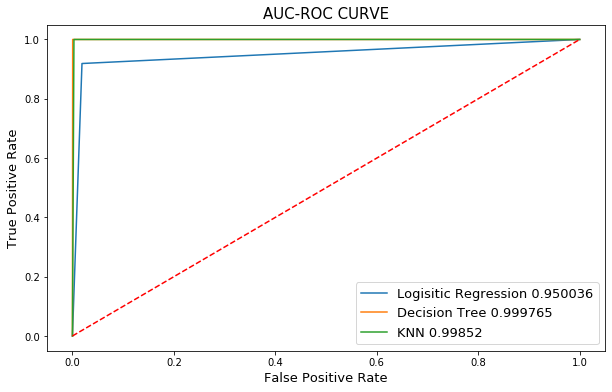

In [33]:
plt.figure(figsize = (10,6))
plt.title('AUC-ROC CURVE', fontsize = 15)
cl = list(test.columns[1:])

for i in range(5):
    if i%2 == 0:
        la = cl[i]+' '+str(auc1[i])
        plt.plot(fpr[i],tpr[i], label = la)

'''
plt.plot(fpr[0],tpr[0], label = str('Logistic Regression'+' '+str(auc1[0])))
plt.plot(fpr[1],tpr[1], label = str('Logistic Regression using CV'+' '+str(auc1[1])))
plt.plot(fpr[2],tpr[2], label = str('Decision Tree'+' '+str(auc1[2])))
plt.plot(fpr[3],tpr[3], label = str('Bagging'+' '+str(auc1[3])))
plt.plot(fpr[4],tpr[4], label = str('KNN'+' '+str(auc1[4])))
'''

plt.plot([0,1],[0,1],'r--')
plt.legend(loc = 0, fontsize = 13)
plt.xlabel('False Positive Rate', fontsize = 13)
plt.ylabel('True Positive Rate', fontsize = 13)
plt.show()

In [35]:
auc1

[0.950036, 0.950025, 0.999765, 0.999988, 0.99852]